In [1]:
import pandas as pd
import numpy as np
import os
from pandas import Series, DataFrame, Panel
from datetime import datetime


In [16]:

import plotly.plotly as py
import cufflinks as cf
import seaborn as sns


from matplotlib import pyplot


In [22]:
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# filename = './data/unhashed/russia_201901_1_tweets_csv_unhashed.csv'

In [2]:
def processHour(filename = None):
    df = pd.read_csv(filename, dtype = {
        "tweetid": str,
        "userid": str,
        "user_display_name": str,
        "user_screen_name": str,
        "user_reported_location": str,
        "user_profile_description": str,
        "user_profile_url": str,
        "follower_count": str,
        "following_count": str,
        "account_creation_date": str,
        "account_language": str,
        "tweet_text": str,
        "tweet_time": str,
        "tweet_client_name": str,
        "in_reply_to_tweetid": str,
        "in_reply_to_userid": str,
        "quoted_tweet_tweetid": str,
        "is_retweet": bool,
        "retweet_userid": str,
        "retweet_tweetid": str,
        "latitude": str,
        "longitude": str,
        "quote_count": np.float64,
        "reply_count": np.float64,
        "like_count": np.float64,
        "retweet_count": np.float64,
        "hashtags": str,
        "urls": str,
        "user_mentions": str,
        "poll_choices": str,
    })
    
    df['tweet_record_time'] = pd.to_datetime(df['tweet_time'], format ='%Y-%m-%d %H:%M')


    time = []

    for i in df['tweet_record_time']:
        time.append(i.time())

    df['time'] = time


    hour =[]
    time_float = []

    for i in df['time']:
        hour.append(i.hour)
        time_float.append(i.hour+i.minute/60.0)

    df['hour'] = hour
    df['time_float'] = time_float
    return df

In [3]:
def getPeakAttention(df, country):
    df_hr = df.crosstab(df.userid, df.hour)

#     df_hr = DataFrame(df_hr)

    df_hr.reset_index(inplace=True)

    df_hr.columns = ['hour', 'post']
    df_hr['country'] = country
    df_hr.to_csv("Hour_float.csv", mode = 'a', header = False)
#     sum = df_hr.post.sum()
#     max = df_hr.post.max()
#     print("Sum: ", sum , "\nMax: ", max, "\n")
#     return max/sum

In [4]:
filename = './data/unhashed/iranian_tweets_csv_unhashed.csv'
iranian = processHour(filename)

In [6]:
 iranian_hr = pd.crosstab(iranian.userid, iranian.hour)

In [9]:
 iranian_hr = iranian_hr.reset_index(level=0, inplace=True)

In [15]:
 iranian_hr.head()

hour,userid,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,peak_attention
0,1000361556155228160,0,0,0,0,0,0,38,0,0,...,0,0,0,0,0,0,0,0,0,0.655172
1,1000401169313824768,0,0,0,0,0,0,2,6,0,...,0,0,0,0,0,0,0,0,0,0.558140
2,1000652498011639808,0,0,0,0,1,4,2,2,3,...,0,0,0,0,0,0,0,0,0,0.428571
3,1000705337924685824,0,1,0,1,15,29,40,35,42,...,11,13,16,11,16,12,1,4,3,0.120690
4,1000730947506114562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.750000


In [12]:
#  iranian_hr.columns = []

In [14]:
iranian_hr['peak_attention'] =  iranian_hr.max(axis=1)/ iranian_hr.sum(axis=1)

In [17]:
iranian_hr['type'] = 'IO'

In [18]:
iranian_hr['sum'] = iranian_hr.sum(axis=1)

In [ ]:
filename = './data/iran_baseline_tweets.csv'
iranian = processHour(filename)

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [25]:
sns.set()

Text(0, 0.5, 'Percentage of tweets from peak tweeting time')

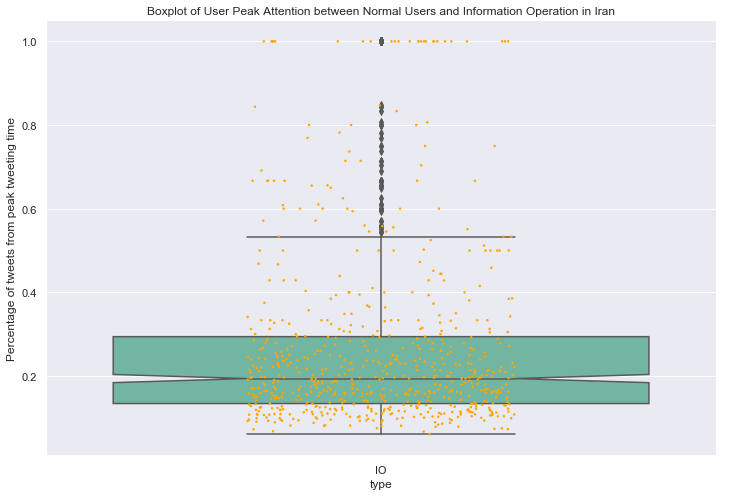

In [26]:
ax = sns.boxplot(x='type', y='peak_attention', data = iranian_hr, notch=True, palette="Set2")

# ax = sns.swarmplot(x='country', y='percentage', data = retweet_percentage, color="grey")
ax = sns.stripplot(x='type', y='peak_attention', data = iranian_hr, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot of User Peak Attention between Normal Users and Information Operation in Iran", loc="center")
plt.ylabel("Percentage of tweets from peak tweeting time")
